<a href="https://colab.research.google.com/github/saivarsha123/AIML-2025/blob/main/2303A54065_labexternal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df=pd.read_csv("/content/MilkQuality.csv")
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [25]:
df.shape

(1059, 8)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [29]:
df.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


In [30]:
df=df.dropna()

In [31]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [32]:
print("\nEDA: Descriptive Statistics")
print(df.describe())


EDA: Descriptive Statistics
                pH   Temprature        Taste         Odor         Fat   \
count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000   
mean      6.630123    44.226629     0.546742     0.432483     0.671388   
std       1.399679    10.098364     0.498046     0.495655     0.469930   
min       3.000000    34.000000     0.000000     0.000000     0.000000   
25%       6.500000    38.000000     0.000000     0.000000     0.000000   
50%       6.700000    41.000000     1.000000     0.000000     1.000000   
75%       6.800000    45.000000     1.000000     1.000000     1.000000   
max       9.500000    90.000000     1.000000     1.000000     1.000000   

         Turbidity       Colour  
count  1059.000000  1059.000000  
mean      0.491029   251.840415  
std       0.500156     4.307424  
min       0.000000   240.000000  
25%       0.000000   250.000000  
50%       0.000000   255.000000  
75%       1.000000   255.000000  
max       1.000000   255.000000 

In [34]:
non_numeric_cols = df.select_dtypes(include=['object']).columns

In [35]:
if len(non_numeric_cols) > 0:
    print(f"Non-numeric columns found: {non_numeric_cols}")
    # Drop non-numeric columns for the heatmap
    df_numeric = df.drop(non_numeric_cols, axis=1)
else:
    df_numeric = df

Non-numeric columns found: Index(['Grade'], dtype='object')


In [36]:
print("Columns used for correlation heatmap:", df_numeric.columns)

Columns used for correlation heatmap: Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'], dtype='object')


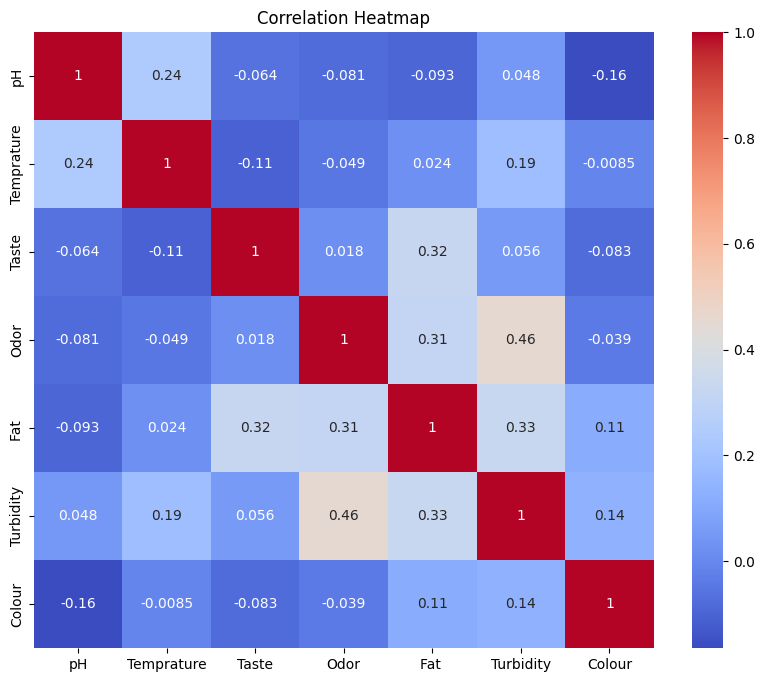

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [40]:
X = df.drop('Grade', axis=1)
y = df['Grade']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [49]:
print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nPrecision (Testing):", precision_score(y_test, y_pred_test, average='weighted'))
print("\nConfusion Matrix (Testing):\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report (Testing):\n", classification_report(y_test, y_pred_test))


Training Accuracy: 1.0
Testing Accuracy: 0.9905660377358491

Precision (Testing): 0.9906202559097809

Confusion Matrix (Testing):
 [[47  0  1]
 [ 1 77  0]
 [ 0  0 86]]

Classification Report (Testing):
               precision    recall  f1-score   support

        high       0.98      0.98      0.98        48
         low       1.00      0.99      0.99        78
      medium       0.99      1.00      0.99        86

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [52]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(criterion='gini', random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1)

grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [53]:
y_pred_best = best_model.predict(X_test)
print("\nBest Model Accuracy (Testing):", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix (Best Model Testing):\n", confusion_matrix(y_test, y_pred_best))


Best Model Accuracy (Testing): 0.9905660377358491

Confusion Matrix (Best Model Testing):
 [[47  0  1]
 [ 1 77  0]
 [ 0  0 86]]
